<H1>DRAW SWARM AT STEP X</H1>

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)

<h2>LOAD DATA</h2>

In [2]:
S=pd.read_csv('data/csv/exp.p.csv')
C=pd.read_csv('data/csv/exp.c.csv')
R=pd.read_csv('data/csv/exp.r.csv')

<h2>EXTRACT STEP</h2>

In [3]:
step=346
AGENTS=S[["STEP","ID","X","Y"]].query("STEP==%d" % step)
COHESION=C[["STEP","PX","PY","NX","NY",]].query("STEP==%d" % step)
COHESIONP=C[["STEP","PX","PY","NX","NY","PPERIM","NPERIM"]].query("PPERIM==True and NPERIM==True and STEP==%d" % step)
REPULSION=R[["STEP","PX","PY","NX","NY",]].query("STEP==%d" % step)

<h2>SWARM GRAPH</h2>

In [7]:
%matplotlib qt
plt.scatter(AGENTS["X"],AGENTS["Y"],s=100,color="green")
for i,row in COHESION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="lightgreen")
for i,row in COHESIONP.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],color="darkgreen")

plt.title("Swarm Cohesion at STEP:[%d]" % step)
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

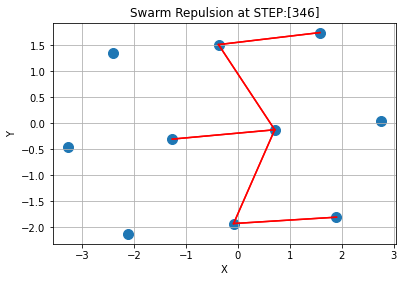

In [5]:
%matplotlib inline
for i,row in REPULSION.iterrows():
    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],"r-")
plt.scatter(AGENTS["X"],AGENTS["Y"],s=100)
plt.title("Swarm Repulsion at STEP:[%d]" % step)
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()